In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def plot_results(history):
    epochs = list(range(1, len(history['train_loss']) + 1))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(epochs, history['train_loss'], label='Train Loss', marker='o')
    axes[0].plot(epochs, history['val_loss'], label='Validation Loss', marker='s')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training vs Validation Loss')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(epochs, history['train_acc'], label='Train Accuracy', marker='o')
    axes[1].plot(epochs, history['val_acc'], label='Validation Accuracy', marker='s')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Training vs Validation Accuracy')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [3]:
def generate_classification_report(y_true, y_pred, labels=None):
    if labels is None:
        labels = sorted(set(y_true) | set(y_pred))

    tp = defaultdict(int)
    fp = defaultdict(int)
    fn = defaultdict(int)
    support = defaultdict(int)

    for true, pred in zip(y_true, y_pred):
        support[true] += 1
        if true == pred:
            tp[true] += 1
        else:
            fp[pred] += 1
            fn[true] += 1

    report = {}
    for label in labels:
        tp_val = tp[label]
        fp_val = fp[label]
        fn_val = fn[label]
        sup = support[label]

        precision = tp_val / (tp_val + fp_val) if (tp_val + fp_val) > 0 else 0.0

        recall = tp_val / (tp_val + fn_val) if (tp_val + fn_val) > 0 else 0.0

        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1,
            'support': sup
        }

    macro_precision = np.mean([report[l]['precision'] for l in labels])
    macro_recall = np.mean([report[l]['recall'] for l in labels])
    macro_f1 = np.mean([report[l]['f1-score'] for l in labels])
    total_support = sum(report[l]['support'] for l in labels)

    report['macro avg'] = {
        'precision': macro_precision,
        'recall': macro_recall,
        'f1-score': macro_f1,
        'support': total_support
    }

    weighted_precision = np.sum([report[l]['precision'] * report[l]['support'] for l in labels]) / total_support
    weighted_recall = np.sum([report[l]['recall'] * report[l]['support'] for l in labels]) / total_support
    weighted_f1 = np.sum([report[l]['f1-score'] * report[l]['support'] for l in labels]) / total_support

    report['weighted avg'] = {
        'precision': weighted_precision,
        'recall': weighted_recall,
        'f1-score': weighted_f1,
        'support': total_support
    }

    return report

In [4]:
def compute_confusion_matrix(y_true, y_pred, labels=None):
    if labels is None:
        labels = sorted(set(y_true) | set(y_pred))

    label_to_idx = {label: i for i, label in enumerate(labels)}
    n = len(labels)
    cm = np.zeros((n, n), dtype=int)

    for true, pred in zip(y_true, y_pred):
        true_idx = label_to_idx[true]
        pred_idx = label_to_idx[pred]
        cm[true_idx][pred_idx] += 1

    return cm, labels

def print_confusion_matrix(cm, labels):
    print("\nConfusion Matrix:")
    print("Rows = True, Columns = Predicted\n")
    header = " " * 10 + " ".join([f"{l:>5}" for l in labels])
    print(header)
    print("-" * len(header))
    for i, row in enumerate(cm):
        print(f"{labels[i]:>10}", end=" ")
        for val in row:
            print(f"{val:>5}", end=" ")
        print()

# Example with dummy data

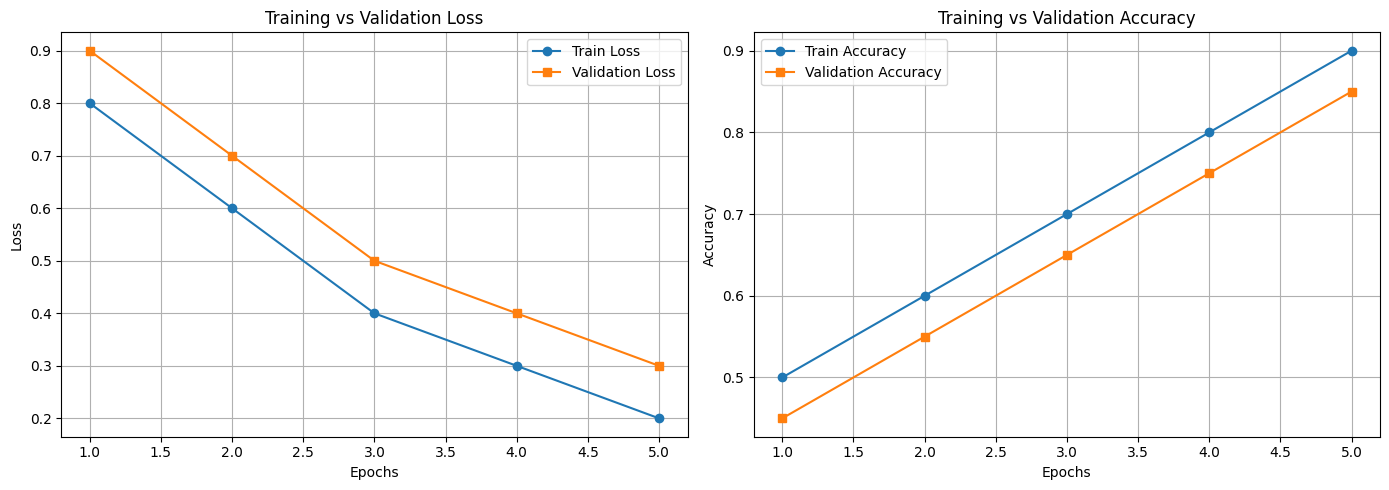

Classification Report:
Class       Precision     Recall   F1-Score    Support
0                1.00       1.00       1.00          3
1                0.67       0.67       0.67          3
2                0.67       0.67       0.67          3
macro avg        0.78       0.78       0.78          9
weighted avg       0.78       0.78       0.78          9

Confusion Matrix:
Rows = True, Columns = Predicted

              0     1     2
---------------------------
         0     3     0     0 
         1     0     2     1 
         2     0     1     2 


In [6]:
y_true = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_pred = [0, 1, 1, 0, 2, 2, 0, 1, 2]

history = {
    'train_loss': [0.8, 0.6, 0.4, 0.3, 0.2],
    'val_loss': [0.9, 0.7, 0.5, 0.4, 0.3],
    'train_acc': [0.5, 0.6, 0.7, 0.8, 0.9],
    'val_acc': [0.45, 0.55, 0.65, 0.75, 0.85]
}

plot_results(history)

report = generate_classification_report(y_true, y_pred)
print("Classification Report:")
print("{:10} {:>10} {:>10} {:>10} {:>10}".format("Class", "Precision", "Recall", "F1-Score", "Support"))
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print("{:10} {:10.2f} {:10.2f} {:10.2f} {:10}".format(
            str(label),
            metrics['precision'],
            metrics['recall'],
            metrics['f1-score'],
            metrics['support']
        ))

cm, labels = compute_confusion_matrix(y_true, y_pred)
print_confusion_matrix(cm, labels)